In [61]:
import sys

sys.path.append('../../MembraneQuant')
from membranequant import *

%matplotlib notebook

In [64]:
basepath = '/Users/blandt/Desktop/Data/PAR2 RING mutants experiment 2/'

In [65]:
ch1_bg = load_image(basepath + '/211106_n2_tom4,15,60/Background!/ch1_mean.tif')
ch2_bg = load_image(basepath + '/211106_n2_tom4,15,60/Background!/ch2_mean.tif')
ch3_bg = load_image(basepath + '/211106_n2_tom4,15,60/Background!/ch3_mean.tif')

ch1_df = load_image(basepath + '/211106_n2_tom4,15,60/Darkframes!/ch1_mean.tif')
ch2_df = load_image(basepath + '/211106_n2_tom4,15,60/Darkframes!/ch2_mean.tif')
ch3_df = load_image(basepath + '/211106_n2_tom4,15,60/Darkframes!/ch3_mean.tif')

## AF calibration

In [66]:
n2_paths = direcslist(basepath, 1, exclusive=['_n2_',])

ch1 = [load_image(glob.glob(p + '/*488 SP 535-50*')[0]) for p in n2_paths]
ch2 = [load_image(glob.glob(p + '/*488 SP 630-75*')[0]) for p in n2_paths]
ch3 = [load_image(glob.glob(p + '/*561 SP 630-75*')[0]) for p in n2_paths]

roi = [offset_coordinates(np.loadtxt(p + '/ROI.txt'), 10) for p in n2_paths]
mask = [make_mask([512, 512], r) for r in roi]

In [67]:
ch1_flat = [((i - ch1_df) / (ch1_bg - ch1_df)) - 1 for i in ch1]
ch2_flat = [((i - ch2_df) / (ch2_bg - ch2_df)) - 1 for i in ch2]
ch3_flat = [((i - ch3_df) / (ch3_bg - ch3_df)) - 1 for i in ch3]

In [68]:
# for c in ch1_flat:
#     fig, ax = plt.subplots()
#     ax.imshow(c)

In [69]:
[save_img(i, p + '/ch1_flat.tif') for i, p in zip(ch1_flat, n2_paths)]
[save_img(i, p + '/ch2_flat.tif') for i, p in zip(ch2_flat, n2_paths)]
[save_img(i, p + '/ch3_flat.tif') for i, p in zip(ch3_flat, n2_paths)]

[None, None, None, None, None, None, None, None]

<IPython.core.display.Javascript object>


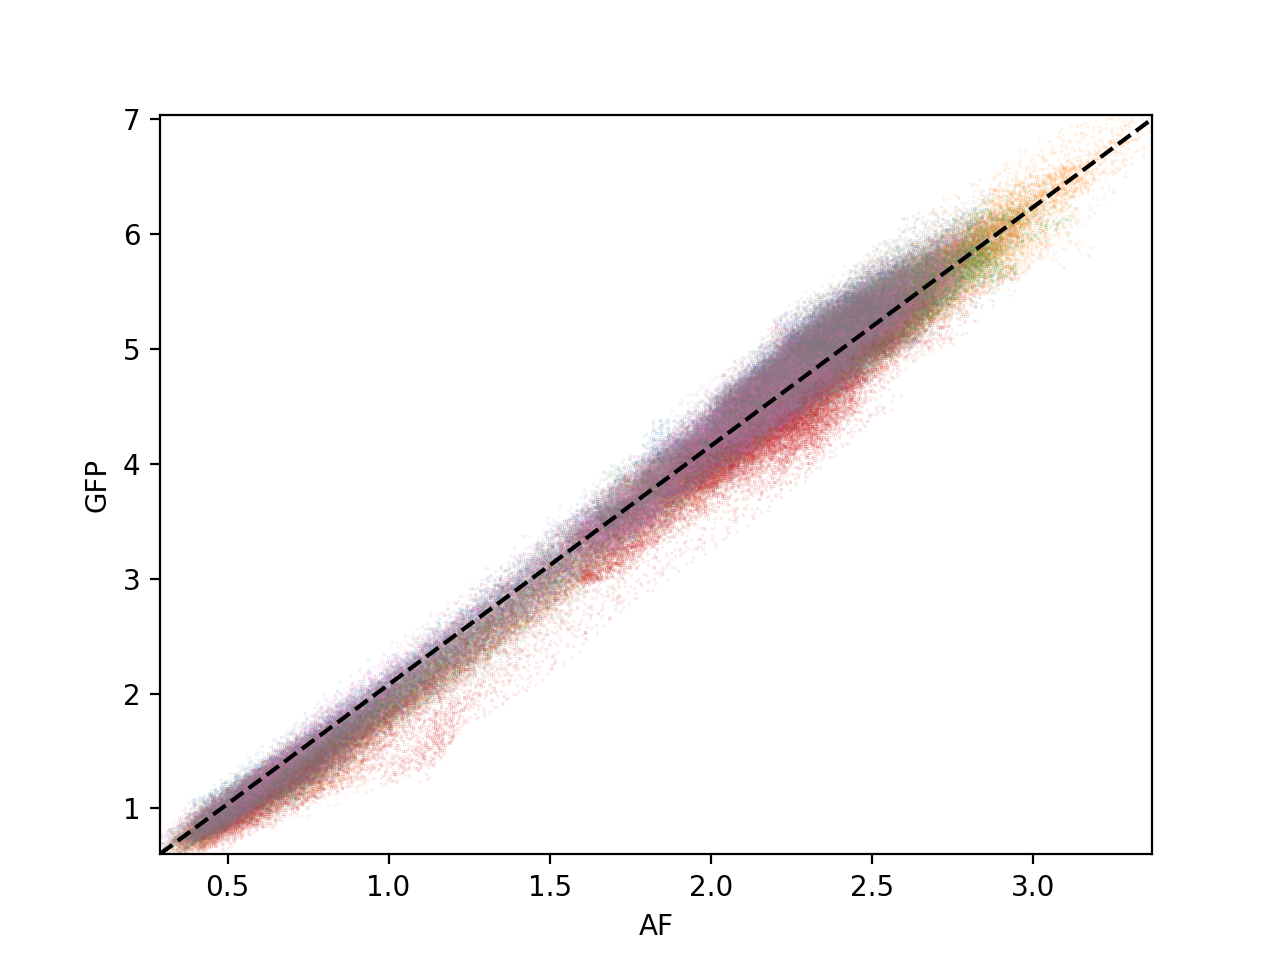

[2.078396363029439, 0]


In [70]:
af2 = AfCorrelation(n2_paths, gfp_regex='*ch1_flat*', af_regex='*ch2_flat*',
                    sigma=2, expand=10, method='OLS', intercept0=True)
af2.run()
af2.plot_correlation()
print(af2.params)

<IPython.core.display.Javascript object>


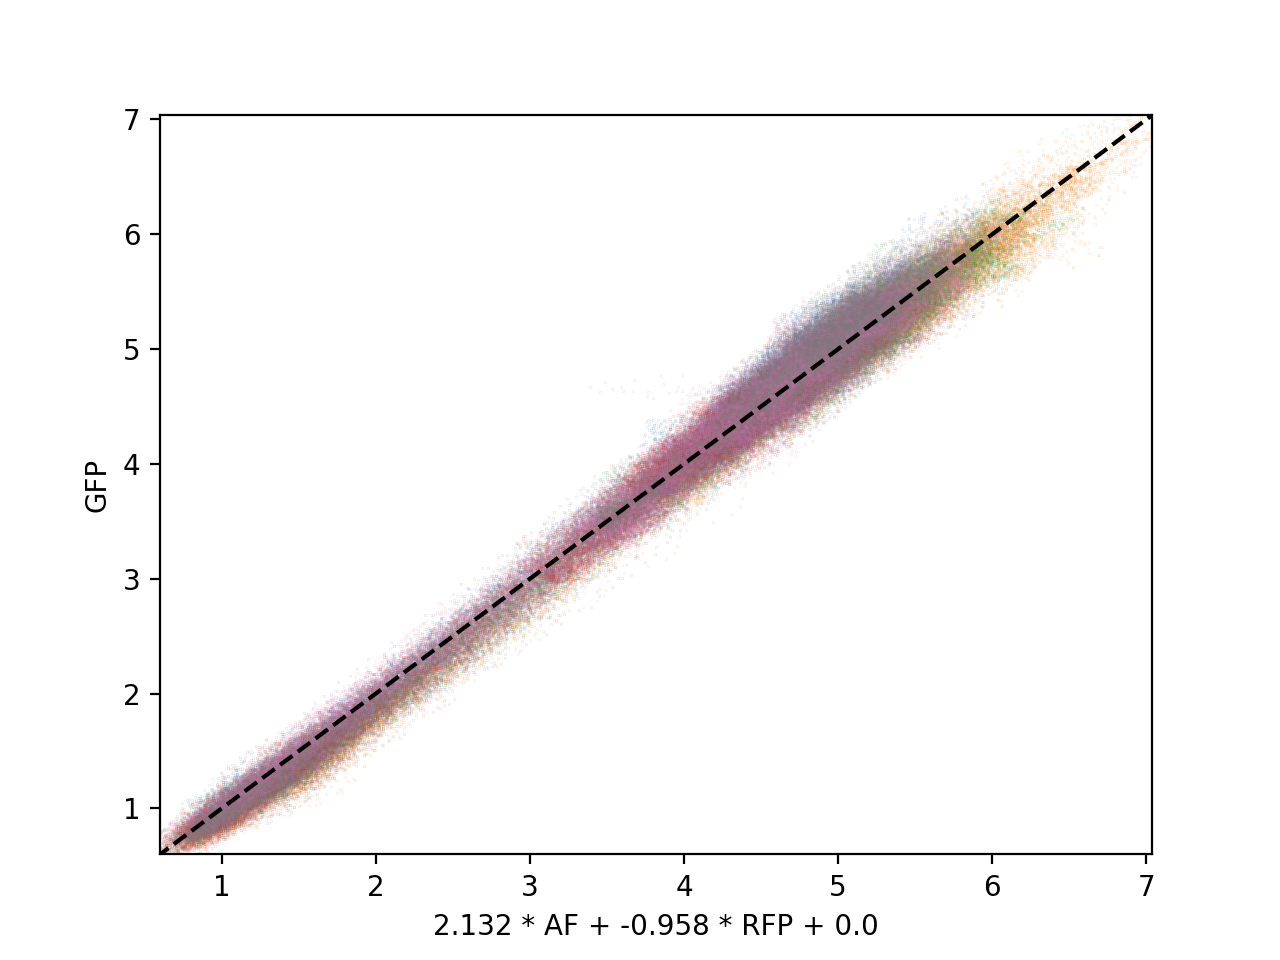

[2.132261354325825, -0.9581735453542257, 0]


In [58]:
af3 = AfCorrelation(n2_paths, gfp_regex='*ch1_flat*', af_regex='*ch2_flat*', rfp_regex='*ch3_flat*',
                    sigma=2, expand=10, method='OLS', intercept0=True)
af3.run()
af3.plot_prediction()
print(af3.params)

## AF correction

In [60]:
for p in direcslist(basepath, 1):
    ch1 = load_image(glob.glob(p + '/*488 SP 535-50*')[0])
    ch2 = load_image(glob.glob(p + '/*488 SP 630-75*')[0])
    ch3 = load_image(glob.glob(p + '/*561 SP 630-75*')[0])
    
    ch1_flat = ((ch1 - ch1_df) / (ch1_bg - ch1_df)) - 1
    ch2_flat = ((ch2 - ch2_df) / (ch2_bg - ch2_df)) - 1
    ch3_flat = ((ch3 - ch3_df) / (ch3_bg - ch3_df)) - 1
    
    af_corrected2 = af_subtraction(ch1_flat, ch2_flat, *af2.params)
    af_corrected3 = af_subtraction_3channel(ch1_flat, ch2_flat, ch3_flat, *af3.params)
    
    save_img(af_corrected2, p + '/af_corrected_flat.tif')
    save_img(af_corrected3, p + '/af_corrected_3channel_flat.tif')